In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import textwrap
import scipy.stats as stats

## Files

In [2]:
## Figure 2 Data File
ecosystem_type = pd.read_csv('Specific_habitats.csv')

## Figures 3 & 4 Data File
df = pd.read_csv('Compiled_change.csv')

## Figure 5 Data in code block for Figure 5

## Figure S2 Data File
ecosystem_stats = pd.read_csv('Ecosystem_stats.csv')

## Figure S3 Data in code block for Figure S3


##Intial Data Files for cleaning 
# seascape_25  = pd.read_csv("Seascape_25.csv")
# seascape_100 = pd.read_csv("Seascape_100.csv")
# seascape_225 = pd.read_csv("Seascape_225.csv")
# seascape_400 = pd.read_csv("Seascape_400.csv")
# seascape_625 = pd.read_csv("Seascape_625.csv")
# seascape_900 = pd.read_csv("Seascape_900.csv")

#### Clean Intial Files

#### Seascape 25

#### Seascape 100

#### Seascape 225

#### Seascape 400

#### Seascape 625

#### Seascape 900

#### Upload the newly cleaned datafiles 

# Figure 2

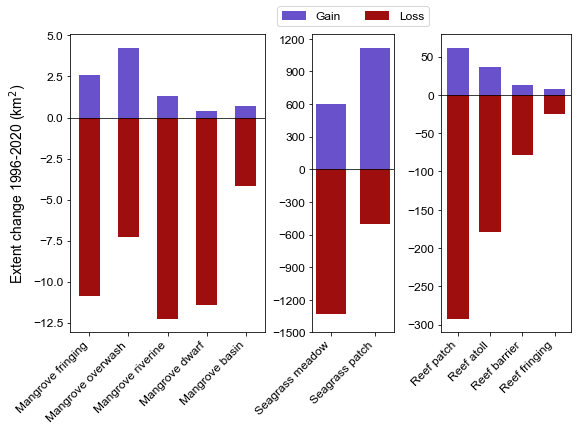

In [3]:
# Calculate the average gain and loss for each habitat type
avg_data = ecosystem_type.groupby('habitat_type').agg({'loss': 'sum', 'gain': 'sum'}).reset_index()

# Sort the data as requested: mangrove types first, then seagrass, then reef
habitat_order = [
    'Mangrove fringing', 'Mangrove overwash', 'Mangrove riverine', 'Mangrove dwarf', 'Mangrove basin', 
    'Seagrass meadow','Seagrass patch', 
    'Reef patch', 'Reef atoll', 'Reef barrier', 'Reef fringing' 
]

# Sort the data as requested: mangrove types first, then seagrass, then reef
# habitat_order = [
#     'Fringing', 'Overwash', 'Riverine', 'Dwarf', 'Basin', 
#     'Meadow','Patch', 
#     'Patch-reef', 'Atoll', 'Barrier', 'Fringing-reef' 
# ]


avg_data['habitat_type'] = pd.Categorical(avg_data['habitat_type'], categories=habitat_order, ordered=True)
avg_data = avg_data.sort_values('habitat_type')

# Separate the data for mangroves, seagrasses, and reefs
mangrove_data = avg_data[avg_data['habitat_type'].str.contains('Mangrove')]
seagrass_data = avg_data[avg_data['habitat_type'].str.contains('Seagrass')]
reef_data = avg_data[avg_data['habitat_type'].str.contains('Reef')]

# Set up the font
rcParams['font.family'] = 'Arial'

y_ticks1 = list(range(-1500, 1500, 300))

# Create the figure and axes with 3 subplots in one row and three columns, and reduce space between columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6), sharey=False,
                         gridspec_kw={'width_ratios': [3, 1.25, 2], 'wspace': 0.35})  # Adjust 'wspace' to reduce the space between columns

# Create x-values with reduced spacing within each group for tighter plotting
x_mangrove = np.arange(len(mangrove_data)) * 0.15  # Adjust 0.5 for tighter spacing
x_seagrass = np.arange(len(seagrass_data)) * 0.05
x_reef = np.arange(len(reef_data)) * 0.15

# Plot mangrove data on the first axis
axes[0].bar(x_mangrove, mangrove_data['gain'], width=0.08, align='center', color='#6a51cc', label='Gain')
axes[0].bar(x_mangrove, -mangrove_data['loss'], width=0.08, align='center', color='#9f0e0e', label='Loss')
axes[0].set_ylabel('Extent change 1996-2020 (km$^2$)', fontsize=14)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].set_xticks(x_mangrove)
axes[0].set_xticklabels(mangrove_data['habitat_type'], rotation=45, ha='right', fontsize=12)
axes[0].tick_params(axis='y', labelsize=12)
# axes[0].legend(loc='center', bbox_to_anchor=(0.82, 0.925),fontsize=12)
# axes[0].set_title('Mangrove', fontsize=14, pad=10)

# Plot seagrass data on the second axis
axes[1].bar(x_seagrass, seagrass_data['gain'], width=0.034, align='center', color='#6a51cc', label='Gain')
axes[1].bar(x_seagrass, -seagrass_data['loss'], width=0.034, align='center', color='#9f0e0e', label='Loss')
# axes[1].set_ylabel('Extent change 1996-2020 (km$^2$)', fontsize=14)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_xticks(x_seagrass)
axes[1].set_yticks(y_ticks1)
axes[1].set_xticklabels(seagrass_data['habitat_type'], rotation=45, ha='right', fontsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].legend(loc='center', bbox_to_anchor=(0.5, 1.06), fontsize=12, ncol=2)
# axes[1].set_title('Seagrass', fontsize=14, pad=10)


# Plot reef data on the third axis
axes[2].bar(x_reef, reef_data['gain'], width=0.1, align='center', color='#6a51cc', label='Gain')
axes[2].bar(x_reef, -reef_data['loss'], width=0.1, align='center', color='#9f0e0e', label='Loss')
# axes[2].set_ylabel('Extent change 1996-2020 (km$^2$)', fontsize=14)
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[2].set_xticks(x_reef)
axes[2].set_xticklabels(reef_data['habitat_type'], rotation=45, ha='right', fontsize=12)
axes[2].tick_params(axis='y', labelsize=12)
# axes[2].legend(loc='center', bbox_to_anchor=(0.735, 0.925), fontsize=12) #0.73, 0.07
# axes[2].set_title('Reef', fontsize=14, pad=10)

# Customize all plots
for ax in axes:
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# plt.tight_layout()

# Optionally, further reduce white space using subplots_adjust
plt.subplots_adjust(left=0.12, right=0.99, top=0.92, bottom=0.23)

# Save the figure
# fig.savefig('Figure 2.jpg', dpi=600, bbox_inches='tight')
# fig.savefig('Chpt2_Figure_4.svg')

# plt.show()


### Specific Habitat Type Percent Changes

In [4]:
# Define the dataset
data = {
    'area_1996': [141.2875249, 130.3389018, 203.2863291, 72.19184921, 297.9879869, 2027.27793, 635.1592972, 90.41453644, 29.81607918, 325.9175991, 207.8816343],
    'area_2020': [133.0356728, 119.3217709, 192.32639, 69.15767566, 294.5272503, 1298.185127, 1255.033427, 24.84132917, 12.45278731, 94.80031668, 65.06948424],
    'habitat_type': [
        'Mangrove-Fringing', 'Mangrove-Dwarf', 'Mangrove-Riverine', 'Mangrove-Overwash', 'Mangrove-Basin',
        'Seagrass-Meadow', 'Seagrass-Patch', 'Reef-Barrier', 'Reef-Fringing', 'Reef-Patch', 'Reef-Atoll'
    ]
}

# Create a DataFrame
habitat_data = pd.DataFrame(data)

# Calculate net percent change for each habitat type
habitat_data['percent_change'] = ((habitat_data['area_2020'] - habitat_data['area_1996']) / habitat_data['area_1996']) * 100

# Display the results
for index, row in habitat_data.iterrows():
    print(f"Habitat: {row['habitat_type']} | Percent Change: {row['percent_change']:.2f}%")


Habitat: Mangrove-Fringing | Percent Change: -5.84%
Habitat: Mangrove-Dwarf | Percent Change: -8.45%
Habitat: Mangrove-Riverine | Percent Change: -5.39%
Habitat: Mangrove-Overwash | Percent Change: -4.20%
Habitat: Mangrove-Basin | Percent Change: -1.16%
Habitat: Seagrass-Meadow | Percent Change: -35.96%
Habitat: Seagrass-Patch | Percent Change: 97.59%
Habitat: Reef-Barrier | Percent Change: -72.53%
Habitat: Reef-Fringing | Percent Change: -58.23%
Habitat: Reef-Patch | Percent Change: -70.91%
Habitat: Reef-Atoll | Percent Change: -68.70%


# Figure 3

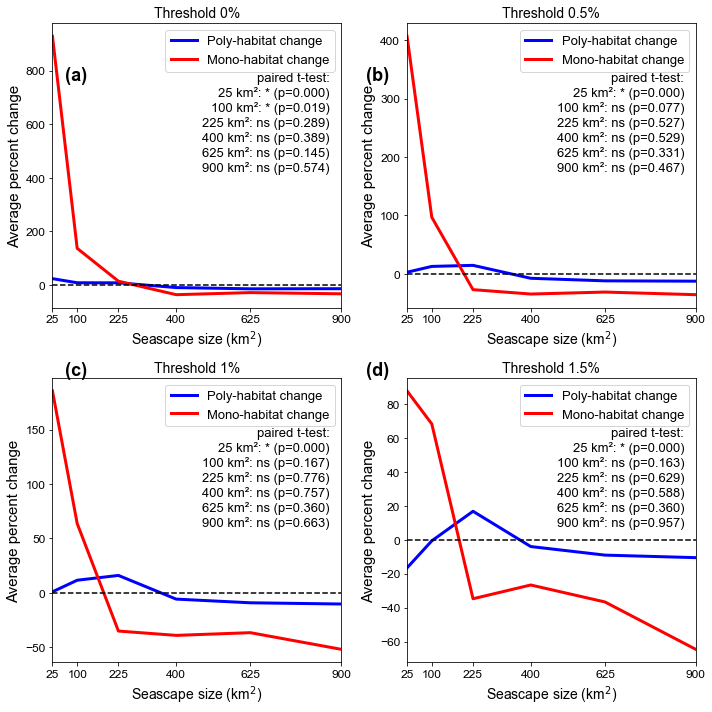

In [9]:
# Function to categorize seascapes
def categorize_seascape(row):
    habitats = set()
    for col in ['0', '0.5', '1', '1.5']:
        if row[col] != 'N':
            habitats.update(list(row[col]))
    if len(habitats) == 0:
        return 'N'
    elif len(habitats) == 1:
        return list(habitats)[0]
    else:
        return ''.join(sorted(habitats))

# Add seascape category column
df['seascape_category'] = df.apply(categorize_seascape, axis=1)

# Function to calculate average percent change
def avg_percent_change(group):
    return group['per_change'].mean()

# Analyze for different extent thresholds and seascape sizes
extent_thresholds = ['0', '0.5', '1', '1.5']
seascape_sizes = df['seascape_size'].unique()

results = {}

for threshold in extent_thresholds:
    for size in seascape_sizes:
        subset = df[(df[threshold] != 'N') & (df['seascape_size'] == size)]
        
        poly_habitat = subset[subset['seascape_category'].str.len() > 1]
        mono_habitat = subset[subset['seascape_category'].str.len() == 1]
        
        poly_change = avg_percent_change(poly_habitat)
        mono_change = avg_percent_change(mono_habitat)
        
        results[(threshold, size)] = {
            'poly': poly_change,
            'mono': mono_change
        }

# Font sizes
axis_label_fontsize = 14
tick_fontsize = 12
seascape_fontsize = 16

# Set up the font
plt.rcParams['font.family'] = 'Arial'

# Visualize results
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Add text annotations for (A), (B), (C), (D)
fig.text(0.11, 0.89, '(a)', ha='center', va='center', fontsize=18, fontweight='bold')
fig.text(0.53, 0.89, '(b)', ha='center', va='center', fontsize=18, fontweight='bold')
fig.text(0.11, 0.48, '(c)', ha='center', va='center', fontsize=18, fontweight='bold')
fig.text(0.53, 0.48, '(d)', ha='center', va='center', fontsize=18, fontweight='bold')

seascape_size_ticks = [25, 100, 225, 400, 625, 900]

for i, threshold in enumerate(extent_thresholds):
    ax = axs[i // 2, i % 2]
    
    poly_changes = []
    mono_changes = []
    sizes = []
    p_values = []
    
    for size in seascape_sizes:
        if (threshold, size) in results:
            sizes.append(size)
            poly_changes.append(results[(threshold, size)]['poly'])
            mono_changes.append(results[(threshold, size)]['mono'])
            
            # Perform paired t-test
            subset = df[(df[threshold] != 'N') & (df['seascape_size'] == size)]
            poly_habitat = subset[subset['seascape_category'].str.len() > 1]['per_change']
            mono_habitat = subset[subset['seascape_category'].str.len() == 1]['per_change']
            
            # Ensure equal length by truncating the longer array
            min_length = min(len(poly_habitat), len(mono_habitat))
            t_stat, p_value = stats.ttest_rel(poly_habitat[:min_length], mono_habitat[:min_length])
            p_values.append(p_value)
    
    ax.plot(sizes, poly_changes, 'b-', label='Poly-habitat change', linewidth=3)
    ax.plot(sizes, mono_changes, 'r-', label='Mono-habitat change', linewidth=3)
    
    ax.set_title(f'Threshold {threshold}%', fontsize=14)
    ax.set_xlabel('Seascape size (km$^2$)', fontsize=axis_label_fontsize)
    ax.set_ylabel('Average percent change', fontsize=15)
    ax.legend(prop={'size': 13})
    ax.axhline(y=0, color='k', linestyle='--')
    
    # Set tick font size
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)  
    ax.set_xticks(seascape_size_ticks)
    ax.set_xticklabels(seascape_size_ticks)
    ax.set_xlim(min(seascape_size_ticks), max(seascape_size_ticks))
    
    # Add significance test results
    significance_text = "paired t-test:\n"
    for size, p_value in zip(sizes, p_values):
        significance_text += f"{size} km²: {'*' if p_value < 0.05 else 'ns'} (p={p_value:.3f})\n"
    
    ax.text(0.96, 0.42, significance_text, transform=ax.transAxes, 
            verticalalignment='bottom', horizontalalignment='right',
            fontsize=13, bbox=dict(facecolor='white', alpha=0.0, edgecolor='none'))


# Save the figure
# fig.savefig('Figure 3.jpg', dpi=600, bbox_inches='tight')
    
# Show the figure
plt.tight_layout()
plt.show()


# Figure 4

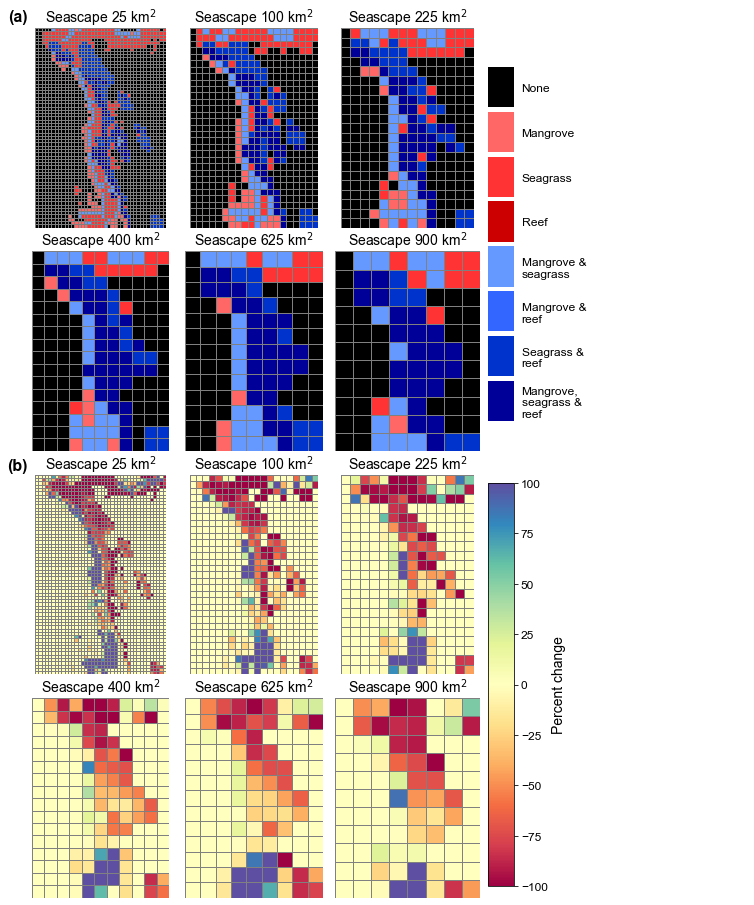

In [11]:
# Load your data
# file_path = 'compiled_change.csv'
# df = pd.read_csv(file_path)

# Extract relevant columns
indices = df['system:index']
percent_changes = df['per_change']
seascape_sizes = df['seascape_size']
ids = df['0']  # Assuming the ID column is named '0'

# Define custom color scheme with seascape names
id_colors = {
    'N': ('black', 'None'),
    'M': ('#FF6666', 'Mangrove'),
    'S': ('#FF3333', 'Seagrass'),
    'R': ('#CC0000', 'Reef'),
    'MS': ('#6699FF', 'Mangrove & seagrass'),
    'MR': ('#3366FF', 'Mangrove & reef'),
    'SR': ('#0033CC', 'Seagrass & reef'),
    'MSR': ('#000099', 'Mangrove, seagrass & reef')
}

# Create a mapping of IDs to numbers
unique_ids = list(id_colors.keys())
id_to_num = {id: i for i, id in enumerate(unique_ids)}
num_ids = ids.map(id_to_num)

# Create a custom colormap for IDs
color_list = [id_colors[id][0] for id in unique_ids]
id_cmap = ListedColormap(color_list)

# Define grid sizes for each seascape size
grid_dimensions = {
    25: (40, 61),
    100: (20, 31),
    225: (14, 21),
    400: (11, 16),
    625: (9, 13),
    900: (8, 11)
}

# Create the subplots with minimal spacing
fig, axs = plt.subplots(4, 3, figsize=(18, 16))
plt.subplots_adjust(wspace=-0.78, hspace=0.12)

# Set up the font
plt.rcParams['font.family'] = 'Arial'

# Loop over the unique seascape sizes to create separate heatmaps
for i, (size, dims) in enumerate(grid_dimensions.items()):
    ax_id = axs[i // 3, i % 3]
    ax_percent = axs[(i // 3) + 2, i % 3]
    
    mask = seascape_sizes == size
    size_indices = indices[mask]
    size_changes = percent_changes[mask]
    size_ids = num_ids[mask]
    
    grid_width, grid_height = dims
    
    # Create 2D numpy arrays to store values in grid format
    id_heatmap_data = np.full((grid_height, grid_width), np.nan)
    percent_heatmap_data = np.full((grid_height, grid_width), np.nan)
    
    # Populate the heatmap data based on grid positions
    for j, (idx, change, id_val) in enumerate(zip(size_indices, size_changes, size_ids)):
        x = j % grid_width
        y = j // grid_width
        if y < grid_height:
            id_heatmap_data[y, x] = id_val
            percent_heatmap_data[y, x] = change
    
    # Create the ID heatmap
    sns.heatmap(id_heatmap_data, ax=ax_id, cmap=id_cmap, cbar=False,
                annot=False, linewidths=0.8, linecolor='gray', square=True)
    ax_id.set_title(f'Seascape {size} km$^2$', fontsize=14)
    ax_id.set_xticks([])
    ax_id.set_yticks([])
    
    # Create the percent change heatmap
    sns.heatmap(percent_heatmap_data, ax=ax_percent, cmap='Spectral', cbar=False,
                annot=False, linewidths=0.8, linecolor='gray', square=True, vmin=-100, vmax=100)
    ax_percent.set_title(f'Seascape {size} km$^2$', fontsize=14)
    ax_percent.set_xticks([])
    ax_percent.set_yticks([])

# Add text annotations for (A) and (B)
fig.text(0.33, 0.89, '(a)', ha='center', va='center', fontsize=16, fontweight='bold')
fig.text(0.33, 0.5, '(b)', ha='center', va='center', fontsize=16, fontweight='bold')
    
# Add color bar for percent change on the right side of the figure
cbar_ax_percent = fig.add_axes([0.693, 0.135, 0.02, 0.35])  # Adjust positioning as needed
cbar_percent = fig.colorbar(axs[3, 2].collections[0], cax=cbar_ax_percent, label='Percent change')

# Adjust the font size of the color bar labels and tick labels
cbar_percent.ax.set_ylabel('Percent change', fontsize=14)
cbar_percent.ax.tick_params(labelsize=12)

# Create a new axes for the legend
legend_ax = fig.add_axes([0.693, 0.5, 0.2, 0.35])  # Adjust position as needed
legend_ax.axis('off')


# Add colored boxes with labels to the legend
for i, (id, (color, name)) in enumerate(id_colors.items()):
    # Position the colored rectangle
    legend_ax.add_patch(plt.Rectangle((0, 1-((i+1)/9)), 0.1, 0.1, facecolor=color))
    
    # Wrap the name text to fit within a specified width
    wrapped_name = textwrap.fill(name, width=10)  # Adjust width as needed
    
    # Adjust the vertical position of the text by modifying the y-coordinate
    # You can tweak the y_offset value to get the desired alignment
    y_offset = 1 - ((i + 1) / 9) + 0.05  # Adjust the 0.03 value for vertical alignment
    
    # Add the text
    legend_ax.text(0.13, y_offset, wrapped_name, va='center_baseline', ha='left', fontsize=12)


# Save the figure
# fig.savefig('Figure 4.jpg', dpi=600, bbox_inches='tight')

plt.show()


# Figure 5

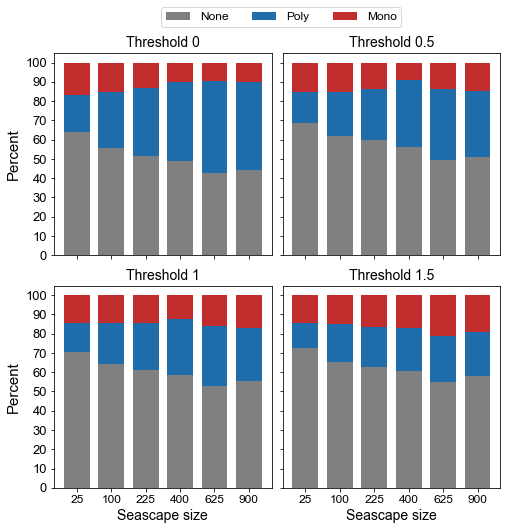

In [12]:
# Create the DataFrame from the provided data
data = {
    'Type': ['None', 'Poly', 'Mono', 'None', 'Poly', 'Mono', 'None', 'Poly', 'Mono', 'None', 'Poly', 'Mono', 'None', 'Poly', 'Mono', 'None', 'Poly', 'Mono'],
    'Size': [25, 25, 25, 100, 100, 100, 225, 225, 225, 400, 400, 400, 625, 625, 625, 900, 900, 900],
    '0': [63.93, 19.34, 16.72, 55.65, 29.03, 15.32, 51.36, 35.37, 13.27, 48.86, 40.91, 10.23, 42.73, 47.86, 9.40, 44.32, 45.45, 10.23],
    '0.5': [68.65, 16.27, 15.08, 61.77, 23.06, 15.16, 59.86, 26.19, 13.95, 56.25, 34.66, 9.09, 49.57, 36.75, 13.68, 51.14, 34.09, 14.77],
    '1': [70.70, 14.67, 14.63, 64.52, 21.13, 14.35, 61.22, 24.15, 14.63, 58.52, 28.98, 12.50, 52.99, 30.77, 16.24, 55.68, 27.27, 17.05],
    '1.5': [72.38, 13.40, 14.22, 65.48, 19.52, 15.00, 62.93, 20.75, 16.33, 60.80, 22.16, 17.05, 54.70, 23.93, 21.37, 57.95, 22.73, 19.32]
}

df2 = pd.DataFrame(data)

# Define the seascape sizes and thresholds
seascape_sizes = ['25', '100', '225', '400', '625', '900']  # Categorical sizes
thresholds = ['0', '0.5', '1', '1.5']
types = ['None', 'Poly', 'Mono']

# Set up the color map for each type
color_map = {
    'None': '#808080',
    'Poly': '#1f6eab',
    'Mono': '#c12d2d'
}

# Set up the subplots for each threshold
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Plot each subplot for each threshold
for i, threshold in enumerate(thresholds):
    ax = axes[i]
    
    # Extract data for this threshold
    none_values = df2[df2['Type'] == 'None'][threshold].values
    poly_values = df2[df2['Type'] == 'Poly'][threshold].values
    mono_values = df2[df2['Type'] == 'Mono'][threshold].values
    
    # Plot stacked bars
    ax.bar(seascape_sizes, none_values, label='None', color=color_map['None'], width=0.75)
    ax.bar(seascape_sizes, poly_values, bottom=none_values, label='Poly', color=color_map['Poly'], width=0.75)
    ax.bar(seascape_sizes, mono_values, bottom=none_values + poly_values, label='Mono', color=color_map['Mono'], width=0.75)

    # Set title and legend
    ax.set_title(f'Threshold {threshold}', fontsize=14)
    # ax.legend(fontsize=12)
    
# Add shared y-axis labels for the two left plots
for ax in axes[::2]:
    ax.set_ylabel('Percent', fontsize=15)
    ax.set_yticks(range(0, 101, 10))  # Set y-ticks from 0 to 100 with a step of 10
    ax.set_yticklabels(range(0, 101, 10), fontsize=13)  # Set the y-tick labels

    
# Add shared x-axis labels for the bottom row
for ax in axes[2:]:
    ax.set_xticks(range(len(seascape_sizes)))
    ax.set_xticklabels(seascape_sizes, fontsize=12)
    
# Add shared x-axis labels for the bottom row
for ax in axes[2:]:
    ax.set_xlabel('Seascape size', fontsize=14)

# Set x-axis limits and ticks
# plt.xticks(seascape_sizes, fontsize=13)

# Add a single legend for all subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.52, 0.97), fontsize=12, ncol=3)

# plt.subplots_adjust(left=0.2, right=0.99, top=1.2, bottom=0.25)

# Show the plot
# plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.05)  # Adjust horizontal and vertical space

# Save the figure
# plt.savefig('Figure 5.jpg', dpi=600, bbox_inches='tight')

plt.show()


# Figure S2

Total percent change in habitat area:
Mangrove: -4.35%
Seagrass: -5.22%
Reef: -69.86%


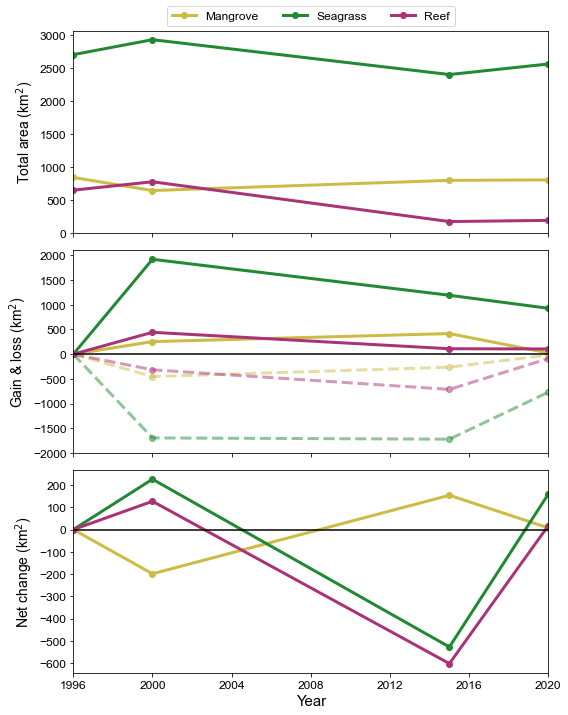

In [14]:
# Extract data for each ecosystem type
mangrove_data = ecosystem_stats[ecosystem_stats['Ecosystem'] == 'mangrove']
seagrass_data = ecosystem_stats[ecosystem_stats['Ecosystem'] == 'seagrass']
reef_data = ecosystem_stats[ecosystem_stats['Ecosystem'] == 'reef']

# Calculate the percent change in total area from the first year to the last year
def calculate_percent_change(data):
    initial_area = data['Total_Area'].values[0]
    final_area = data['Total_Area'].values[-1]
    percent_change = ((final_area - initial_area) / initial_area) * 100
    return percent_change

mangrove_percent_change = calculate_percent_change(mangrove_data)
seagrass_percent_change = calculate_percent_change(seagrass_data)
reef_percent_change = calculate_percent_change(reef_data)

# Print the percent change for each ecosystem
print(f"Total percent change in habitat area:")
print(f"Mangrove: {mangrove_percent_change:.2f}%")
print(f"Seagrass: {seagrass_percent_change:.2f}%")
print(f"Reef: {reef_percent_change:.2f}%")

# Create a figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=True)

x_ticks = list(range(1996, 2021, 4))  # Years: 1996, 2000, 2004, ..., 2020
y_ticks1 = list(range(0, 3001, 500))
y_ticks2 = list(range(-2000, 2001, 500))
y_ticks3 = list(range(-600, 300, 100))

# Set font to Arial for all text elements
plt.rcParams['font.family'] = 'Arial'

# Subplot A: Total Area over Years
ax1.plot(mangrove_data['Year'].values, mangrove_data['Total_Area'].values, marker='o', linestyle='-', linewidth=3, color='#CCBB44', label='Mangrove')
ax1.plot(seagrass_data['Year'].values, seagrass_data['Total_Area'].values, marker='o', linestyle='-', linewidth=3, color='#228833', label='Seagrass')
ax1.plot(reef_data['Year'].values, reef_data['Total_Area'].values, marker='o', linestyle='-', linewidth=3, color='#AA3377', label='Reef')
ax1.set_ylabel('Total area (km$^2$)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
ax1.legend(loc='center', bbox_to_anchor=(0.5, 1.07), prop={'size': 12}, ncol=3)
ax1.set_xlim(1996, 2020)
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks1)

# Subplot B: Gain and Loss over Years
ax2.plot(mangrove_data['Year'].values, mangrove_data['Gain'].values, marker='o', linestyle='-', linewidth=3, color='#CCBB44', label='Mangrove gain')
ax2.plot(mangrove_data['Year'].values, -mangrove_data['Loss'].values, marker='o', linestyle='--', linewidth=3, color='#CCBB44', label='Mangrove loss', alpha=0.5)
ax2.plot(seagrass_data['Year'].values, seagrass_data['Gain'].values, marker='o', linestyle='-', linewidth=3, color='#228833', label='Seagrass gain')
ax2.plot(seagrass_data['Year'].values, -seagrass_data['Loss'].values, marker='o', linestyle='--', linewidth=3, color='#228833', label='Seagrass loss', alpha=0.5)
ax2.plot(reef_data['Year'].values, reef_data['Gain'].values, marker='o', linestyle='-', linewidth=3, color='#AA3377', label='Reef gain')
ax2.plot(reef_data['Year'].values, -reef_data['Loss'].values, marker='o', linestyle='--', linewidth=3, color='#AA3377', label='Reef loss', alpha=0.5)
ax2.set_ylabel('Gain & loss (km$^2$)', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1.5)  # Horizontal line at y=0
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
ax2.set_xlim(1996, 2020)
ax2.set_xticks(x_ticks)
ax2.set_yticks(y_ticks2)

# Subplot C: Net Change over Years
ax3.plot(mangrove_data['Year'].values, (mangrove_data['Gain'] - mangrove_data['Loss']).values, marker='o', linestyle='-', linewidth=3, color='#CCBB44', label='Mangrove')
ax3.plot(seagrass_data['Year'].values, (seagrass_data['Gain'] - seagrass_data['Loss']).values, marker='o', linestyle='-', linewidth=3, color='#228833', label='Seagrass')
ax3.plot(reef_data['Year'].values, (reef_data['Gain'] - reef_data['Loss']).values, marker='o', linestyle='-', linewidth=3, color='#AA3377', label='Reef')
ax3.set_xlabel('Year', fontsize=15)
ax3.set_ylabel('Net change (km$^2$)', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1.5)  # Horizontal line at y=0
# ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
ax3.set_xlim(1996, 2020)
ax3.set_xticks(x_ticks)
ax3.set_yticks(y_ticks3)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to accommodate legends
plt.show()

# Save the figure
# fig.savefig('Figure S2.jpg',dpi=600, bbox_inches='tight')


# Figure S3

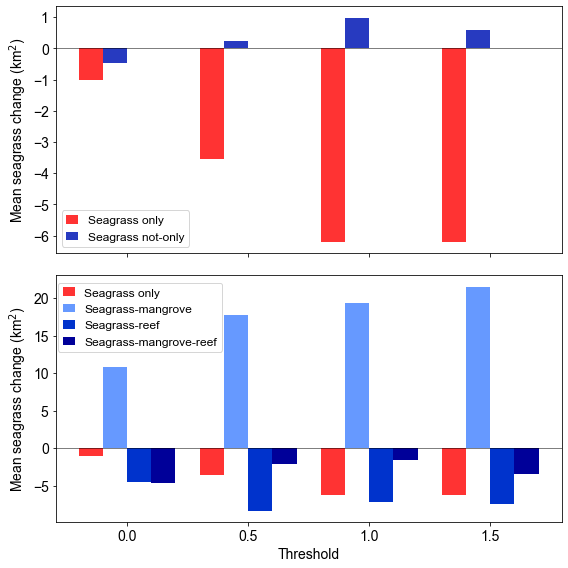

In [15]:
# Load the CSV file
df3 = pd.read_csv('Compiled_seascapes.csv')

# Function to compute seagrass change and run statistical test
def analyze_seagrass_change(df, threshold):
    # Filter the seascapes based on the column name for the threshold
    column_name = f'1996_{threshold}'
    
    
    # Create explicit copies of filtered DataFrames
    seagrass_only = df3[df3[column_name] == 'S'].copy()
    seagrass_mangrove = df3[df3[column_name] == 'MS'].copy()
    seagrass_reef = df3[df3[column_name] == 'SR'].copy()
    seagrass_mangrove_reef = df3[df3[column_name] == 'MSR'].copy()
    seagrass_not_only = df3[df3[column_name].isin(['MS', 'SR', 'MSR'])].copy()
    
    # Calculate the total seagrass change using loc
    seagrass_only.loc[:, 'seagrass_change'] = seagrass_only['seagrass_gain'] - seagrass_only['seagrass_loss']
    seagrass_mangrove.loc[:, 'seagrass_change'] = seagrass_mangrove['seagrass_gain'] - seagrass_mangrove['seagrass_loss']
    seagrass_reef.loc[:, 'seagrass_change'] = seagrass_reef['seagrass_gain'] - seagrass_reef['seagrass_loss']
    seagrass_mangrove_reef.loc[:, 'seagrass_change'] = seagrass_mangrove_reef['seagrass_gain'] - seagrass_mangrove_reef['seagrass_loss']
    seagrass_not_only.loc[:, 'seagrass_change'] = seagrass_not_only['seagrass_gain'] - seagrass_not_only['seagrass_loss']
    
    # Perform t-tests to compare the means of the groups against seagrass only
    t_stat_ms, p_value_ms = stats.ttest_ind(seagrass_only['seagrass_change'], seagrass_mangrove['seagrass_change'], nan_policy='omit')
    t_stat_sr, p_value_sr = stats.ttest_ind(seagrass_only['seagrass_change'], seagrass_reef['seagrass_change'], nan_policy='omit')
    t_stat_msr, p_value_msr = stats.ttest_ind(seagrass_only['seagrass_change'], seagrass_mangrove_reef['seagrass_change'], nan_policy='omit')
    t_stat_not_only, p_value_not_only = stats.ttest_ind(seagrass_only['seagrass_change'], seagrass_not_only['seagrass_change'], nan_policy='omit')
    
    # Return the result
    return {
        'threshold': threshold,
        'seagrass_only_mean_change': seagrass_only['seagrass_change'].mean(),
        'seagrass_mangrove_mean_change': seagrass_mangrove['seagrass_change'].mean(),
        'seagrass_reef_mean_change': seagrass_reef['seagrass_change'].mean(),
        'seagrass_mangrove_reef_mean_change': seagrass_mangrove_reef['seagrass_change'].mean(),
        'seagrass_not_only_mean_change': seagrass_not_only['seagrass_change'].mean(),
        't_statistic_ms': t_stat_ms,
        'p_value_ms': p_value_ms,
        't_statistic_sr': t_stat_sr,
        'p_value_sr': p_value_sr,
        't_statistic_msr': t_stat_msr,
        'p_value_msr': p_value_msr,
        't_statistic_not_only': t_stat_not_only,
        'p_value_not_only': p_value_not_only
    }

# The rest of the code remains the same..# List of thresholds to analyze
thresholds = [0.0, 0.5, 1.0, 1.5]

# Analyze and store results for all thresholds
results = []
for threshold in thresholds:
    result = analyze_seagrass_change(df, threshold)
    results.append(result)

# Convert the results to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Function to plot seagrass changes with customizable parameters
def plot_seagrass_changes(results_df, comparison_colors, detailed_colors, label_size=12, title_size=16, legend_size=12, font_family='Arial'):
    import numpy as np
    
    # Melt the dataframe for the first subplot (all types)
    melted_df = pd.melt(results_df, id_vars='threshold', 
                        value_vars=['seagrass_only_mean_change', 'seagrass_mangrove_mean_change', 
                                    'seagrass_reef_mean_change', 'seagrass_mangrove_reef_mean_change'],
                        var_name='Seascape_Type', value_name='Mean_Seagrass_Change')
    
    # Rename the values for readability
    melted_df['Seascape_Type'] = melted_df['Seascape_Type'].replace({
        'seagrass_only_mean_change': 'Seagrass only',
        'seagrass_mangrove_mean_change': 'Seagrass-mangrove',
        'seagrass_reef_mean_change': 'Seagrass-reef',
        'seagrass_mangrove_reef_mean_change': 'Seagrass-mangrove-reef'
    })
    
    # Melt the dataframe for the second subplot (seagrass-only vs seagrass not-only)
    melted_df_not_only = pd.melt(results_df, id_vars='threshold', 
                                 value_vars=['seagrass_only_mean_change', 'seagrass_not_only_mean_change'],
                                 var_name='Seascape_Type', value_name='Mean_Seagrass_Change')
    
    # Rename for readability
    melted_df_not_only['Seascape_Type'] = melted_df_not_only['Seascape_Type'].replace({
        'seagrass_only_mean_change': 'Seagrass only',
        'seagrass_not_only_mean_change': 'Seagrass not-only'
    })
    
    # Set custom font
    plt.rcParams['font.family'] = font_family
    
    # Create the figure and subplots (2 rows, 1 column)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

    # Define bar width and position offset
    bar_width = 0.2

    # Reposition bars in the first subplot (seagrass-only vs seagrass not-only)
    x = np.arange(len(results_df['threshold'].unique()))
    for i, hue_category in enumerate(melted_df_not_only['Seascape_Type'].unique()):
        subset = melted_df_not_only[melted_df_not_only['Seascape_Type'] == hue_category]
        axes[0].bar(x + i * bar_width, subset['Mean_Seagrass_Change'], width=bar_width, label=hue_category, color=comparison_colors[i])
    
    axes[0].set_ylabel('Mean seagrass change (km$^2$)', fontsize=label_size)
    axes[0].legend(fontsize=legend_size, title_fontsize=legend_size, loc='lower left', bbox_to_anchor=(0.0, 0.0), handlelength=1.0) #title='Seascape Type'
    
    # Reposition bars in the second subplot (all seascape types)
    for i, hue_category in enumerate(melted_df['Seascape_Type'].unique()):
        subset = melted_df[melted_df['Seascape_Type'] == hue_category]
        axes[1].bar(x + i * bar_width, subset['Mean_Seagrass_Change'], width=bar_width, label=hue_category, color=detailed_colors[i])
    
    axes[1].set_xlabel('Threshold', fontsize=label_size)
    axes[1].set_ylabel('Mean seagrass change (km$^2$)', fontsize=label_size)
    axes[1].legend(fontsize=legend_size, title_fontsize=legend_size, 
                   loc='lower left', bbox_to_anchor=(0.0, 0.68),borderaxespad=0.2, handlelength=1.0) #title='Seascape type'
    
    # Customize x-axis ticks for both subplots
    for ax in axes:
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        ax.set_xticks(x + (len(melted_df['Seascape_Type'].unique()) - 1) * bar_width / 2)
        ax.set_xticklabels(results_df['threshold'].unique())
        ax.tick_params(axis='x', labelsize=label_size)
        ax.tick_params(axis='y', labelsize=label_size)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()
    
    # Save the figure
    fig.savefig('Figure S3.jpg', dpi=600, bbox_inches='tight')

# Usage with separate color palettes
comparison_colors = ['#FF3333', '#273ac0']  # Colors for the comparison plot (2 colors)
detailed_colors = ['#FF3333', '#6699FF', '#0033CC', '#000099']  # Colors for the detailed plot (4 colors)

plot_seagrass_changes(results_df, 
                      comparison_colors=comparison_colors,
                      detailed_colors=detailed_colors,
                      label_size=14, 
                      title_size=14, 
                      legend_size=12, 
                      font_family='Arial')
